In [1]:
# Import libraries
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma=WordNetLemmatizer()
import numpy as np
import nltk
import os
import re
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#import nltk.data
#nltk.download('punkt')  

In [3]:
os.chdir(r'D:\text_analytiics\Kaggle_dataset_new')

In [4]:
train_data_full=pd.read_csv('train.csv')
test_data_full=pd.read_csv('test.csv')
print('train shape: ', train_data_full.shape)
print('test shape: ',test_data_full.shape)

train shape:  (159571, 8)
test shape:  (153164, 2)


In [5]:
train_data_full.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
test_data_full.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
# Reading the test data labels
test_labels=pd.read_csv('test_labels.csv')
print(test_labels.shape)
test_labels.head()

(153164, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [8]:
# join test set with test labels
test_data_with_labels=test_data_full.merge(test_labels, on=['id'], how='inner')
test_data_with_labels.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1


### Note:  We can clearly see the number of class in test set is more than train set.  So for the model to fully understand the -1 category class we should have data points of -1 in train set. So combining train and test set.

In [9]:
# Checking number of unique classes to predict in train and test set
list_of_cat=['toxic', 'severe_toxic','obscene','threat','insult','identity_hate']
for i in list_of_cat:
    print('The number of unique classes in train set in '+str(i)+' class: ',train_data_full[str(i)].unique())
    print('The number of unique classes in test set in '+str(i)+' class: ',test_data_with_labels[str(i)].unique())

The number of unique classes in train set in toxic class:  [0 1]
The number of unique classes in test set in toxic class:  [-1  0  1]
The number of unique classes in train set in severe_toxic class:  [0 1]
The number of unique classes in test set in severe_toxic class:  [-1  0  1]
The number of unique classes in train set in obscene class:  [0 1]
The number of unique classes in test set in obscene class:  [-1  0  1]
The number of unique classes in train set in threat class:  [0 1]
The number of unique classes in test set in threat class:  [-1  0  1]
The number of unique classes in train set in insult class:  [0 1]
The number of unique classes in test set in insult class:  [-1  0  1]
The number of unique classes in train set in identity_hate class:  [0 1]
The number of unique classes in test set in identity_hate class:  [-1  0  1]


In [10]:
full_data_set=train_data_full.append(test_data_with_labels)
print('Full train set shape: ', full_data_set.shape)

Full train set shape:  (312735, 8)


In [11]:
# Check for NA values in each columns
full_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312735 entries, 0 to 153163
Data columns (total 8 columns):
id               312735 non-null object
comment_text     312735 non-null object
toxic            312735 non-null int64
severe_toxic     312735 non-null int64
obscene          312735 non-null int64
threat           312735 non-null int64
insult           312735 non-null int64
identity_hate    312735 non-null int64
dtypes: int64(6), object(2)
memory usage: 21.5+ MB


### Histogram of words in comments

Min of length of comment:  1
Mean of length of comment:  379.7732617071962
Median of length of comment:  193.0
Max of length of comment:  5000


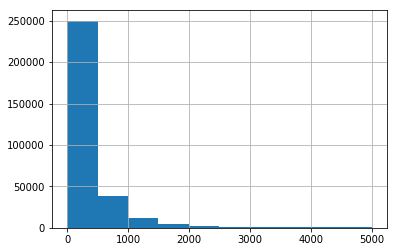

In [12]:
# Length of the word histogram in train set
length_comments_full=full_data_set.comment_text.str.len()
print('Min of length of comment: ',length_comments_full.min())
print('Mean of length of comment: ',length_comments_full.mean())
print('Median of length of comment: ',length_comments_full.median())
print('Max of length of comment: ',length_comments_full.max())
# Skewed to the left side- train set
length_comments_full.hist()

#### Seems more than 80% of comments are of length less than 500 words

### Function to format the comments

In [13]:
# Load the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def comment_format(comments, rem_stopwords=False, lemmatize=False, tokenize=False):
# Function will return the review cleaned only with words. the numbers will be removed
# Stopwords removal can be done using the argument rem_stopwords
# lemmatize the words to the root word using the argument lemmatize

    words_comment=re.sub(r"[^A-Za-z]",' ',comments)
    
    #Convert the text to lower case
    words_comment_lower=words_comment.lower()
    
    #Split each word seperately from sentence
    words_splitted=words_comment_lower.split()
    meaning_full=(' '.join(words_splitted))
    
    # Use the NLTK tokenizer to split the paragraph into sentences
    if tokenize==True:
        raw_sentences = tokenizer.tokenize(words_comment_lower.strip())
        meaning_full=raw_sentences
    
    # Remove stop words
    if rem_stopwords==True:
        if tokenize==True:
            stops=set(stopwords.words('english'))
            words_rem_stops=[x for x in " ".join(raw_sentences).split() if not x in stops]
            meaning_full=(' '.join(words_rem_stops))
        else:
            stops=set(stopwords.words('english'))
            words_rem_stops=[x for x in words_splitted if not x in stops]
            meaning_full=(' '.join(words_rem_stops))
        
    #Lemmaitize each word to get meaningful words
    if lemmatize==True:
        if rem_stopwords==True:
            if tokenize==True:
                meaning_full_words_1=[lemma.lemmatize(x) for x in words_rem_stops]
                meaning_full=(' '.join(meaning_full_words_1))
        elif rem_stopwords==False:
            if tokenize==True:
                meaning_full_words_2=[lemma.lemmatize(x) for x in " ".join(raw_sentences).split()]
                meaning_full=(' '.join(meaning_full_words_2))
        elif rem_stopwords==False:
            if tokenize==False:
                meaning_full_words_3=[lemma.lemmatize(x) for x in " ".join(words_splitted).split()]
                meaning_full=(' '.join(meaning_full_words_3))
        elif rem_stopwords==True:
            if tokenize==False:
                meaning_full_words_4=[lemma.lemmatize(x) for x in words_rem_stops]
                meaning_full=(' '.join(meaning_full_words_4))
        
    return meaning_full

In [14]:
# Checkin the cleaned data
#word_test=train_data_full.comment_text[0]
#x=comment_format(word_test, rem_stopwords=True, tokenize=False, lemmatize=True)
#print(x)

In [15]:
# Cleaning the Full review data
print('Number of reviews in entire dataset: ', full_data_set.comment_text.size)
print('_'*36)

cleaned_comment_full=[]
for comment in full_data_set.comment_text:
    cleaned=comment_format(comment, rem_stopwords=True) # Removing stopwords train data
    cleaned_comment_full.append(cleaned)


print('\n Completed Cleaning the full dataset...')
print('_'*36)

Number of reviews in entire dataset:  312735
____________________________________

 Completed Cleaning the full dataset...
____________________________________


In [16]:
# Cleaning the Unknown (Test) review data
print('Number of reviews in Test dataset: ', test_data_full.comment_text.size)
print('_'*36)

cleaned_comment_test=[]
for comment in test_data_full.comment_text:
    cleaned_=comment_format(comment, rem_stopwords=True) # Removing stopwords train data
    cleaned_comment_test.append(cleaned_)


print('\n Completed cleaning the test dataset...')
print('_'*36)

Number of reviews in Test dataset:  153164
____________________________________

 Completed cleaning the test dataset...
____________________________________


In [17]:
# Creating the Bag of Words - count vectorizer
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 250) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features_count_vec = vectorizer.fit_transform(cleaned_comment_full)

# Numpy arrays are easy to work with, so convert the result to an 
# array
#train_data_features_count_vec = train_data_features_count_vec.toarray()

# Cleaning test data
test_data_features_count_vec = vectorizer.fit_transform(cleaned_comment_test)
#test_data_features_count_vec = test_data_features_count_vec.toarray()

print('Shape of Train data (Count_vectorizer): ', train_data_features_count_vec.shape)
print('Shape of Test data (Count_vectorizer): ', test_data_features_count_vec.shape)


print('Finished....')

Creating the bag of words...

Shape of Train data (Count_vectorizer):  (312735, 250)
Shape of Test data (Count_vectorizer):  (153164, 250)
Finished....


In [18]:
# Creating term frequency inverse document frequency - word vectorizer
print("Creating Term Frequency Inverse Document Frequency (word vectorizer).....\n")
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(sublinear_tf=True, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',\
                                  stop_words='english', ngram_range=(1, 1), max_features=250)

train_data_features_word_vec = word_vectorizer.fit_transform(cleaned_comment_full)
#train_data_features_word_vec = train_data_features_word_vec.toarray()

test_data_features_word_vec = word_vectorizer.fit_transform(cleaned_comment_test)
#test_data_features_word_vec = test_data_features_word_vec.toarray()

print('Shape of Train data (TfidF - word vectorizer): ', train_data_features_word_vec.shape)
print('Shape of Test data (TfidF - word vectorizer): ', test_data_features_word_vec.shape)

print('\n Finished....')

Creating Term Frequency Inverse Document Frequency (word vectorizer).....

Shape of Train data (TfidF - word vectorizer):  (312735, 250)
Shape of Test data (TfidF - word vectorizer):  (153164, 250)

 Finished....


In [19]:
# Combining all the vectorized features to one main feature to pass it into the model
# Import library
from scipy.sparse import hstack

train_features = hstack([train_data_features_count_vec, train_data_features_word_vec])
test_features = hstack([test_data_features_count_vec, test_data_features_word_vec])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import train_test_split
from  sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

dv_var=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
new_df=pd.DataFrame(columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
new_df_1=pd.DataFrame(columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
nww_acc=pd.DataFrame(columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate'])
def get_scores(X, y, classifier, unknown_test, unknown_labels):
    for i in dv_var:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.80)
        model=classifier
        class_model=model.fit(X_train, y_train[str(i)])
        print('Training Completed for '+ str(i) + ' class')
        y_pred=class_model.predict(X_test)
        print('Scoring for unknown test dataset')
        y_unknown=class_model.predict(unknown_test)
        new_df_1[str(i)]=y_unknown
        new_df[str(i)]=y_pred
    print('Prediction on known data 80-20 split made')
    accuracy_known=get_accuracy(new_df, y_test)
    print('Prediction on unknown data')
    accuracy_unknown=get_accuracy(new_df_1, unknown_labels)

def get_accuracy(df, test_set):
    for j in dv_var:
        cm=confusion_matrix(test_set[str(j)], df[str(j)])
        acc=(cm[0][0]+cm[1][1])/cm.sum()
        nww_acc[str(j)]=acc
        print('Accuracy of the predictive model for '+ str(j) +': ', acc)
    return nww_acc

In [24]:
# Logistic regression - Baseline
get_scores(X=train_features, y=full_data_set, unknown_test=test_features, unknown_labels=test_data_with_labels,\
           classifier=LogisticRegression())

Training Completed for toxic class
Scoring for unknown test dataset
Training Completed for severe_toxic class
Scoring for unknown test dataset
Training Completed for obscene class
Scoring for unknown test dataset
Training Completed for threat class
Scoring for unknown test dataset
Training Completed for insult class
Scoring for unknown test dataset
Training Completed for identity_hate class
Scoring for unknown test dataset
Prediction on known data 80-20 split made
Accuracy of the predictive model for toxic:  0.6772027435368603
Accuracy of the predictive model for severe_toxic:  0.7085072025836571
Accuracy of the predictive model for obscene:  0.7048619438182486
Accuracy of the predictive model for threat:  0.7114809663133324
Accuracy of the predictive model for insult:  0.6953970614098198
Accuracy of the predictive model for identity_hate:  0.7075319359841399
Prediction on unknown data
Accuracy of the predictive model for toxic:  0.41737614583061294
Accuracy of the predictive model for

In [25]:
# Naive Baye's  classifier
get_scores(X=train_features.toarray(), y=full_data_set, unknown_test=test_features.toarray(),\
           unknown_labels=test_data_with_labels, classifier=GaussianNB())

Training Completed for toxic class
Scoring for unknown test dataset
Training Completed for severe_toxic class
Scoring for unknown test dataset
Training Completed for obscene class
Scoring for unknown test dataset
Training Completed for threat class
Scoring for unknown test dataset
Training Completed for insult class
Scoring for unknown test dataset
Training Completed for identity_hate class
Scoring for unknown test dataset
Prediction on known data 80-20 split made
Accuracy of the predictive model for toxic:  0.5077781508305754
Accuracy of the predictive model for severe_toxic:  0.5124146641725422
Accuracy of the predictive model for obscene:  0.5001518857818921
Accuracy of the predictive model for threat:  0.40940412809567206
Accuracy of the predictive model for insult:  0.48162182039106594
Accuracy of the predictive model for identity_hate:  0.44860664780085374
Prediction on unknown data
Accuracy of the predictive model for toxic:  0.3561084850225902
Accuracy of the predictive model f

In [28]:
#Random Forest Classifier
get_scores(X=train_features, y=full_data_set, unknown_test=test_features, unknown_labels=test_data_with_labels,\
           classifier=RandomForestClassifier())

Training Completed for toxic class
Scoring for unknown test dataset
Training Completed for severe_toxic class
Scoring for unknown test dataset
Training Completed for obscene class
Scoring for unknown test dataset
Training Completed for threat class
Scoring for unknown test dataset
Training Completed for insult class
Scoring for unknown test dataset
Training Completed for identity_hate class
Scoring for unknown test dataset
Prediction on known data 80-20 split made
Accuracy of the predictive model for toxic:  0.6371528610484916
Accuracy of the predictive model for severe_toxic:  0.6851807440804515
Accuracy of the predictive model for obscene:  0.6660111596079749
Accuracy of the predictive model for threat:  0.6875629526596
Accuracy of the predictive model for insult:  0.6651637968247878
Accuracy of the predictive model for identity_hate:  0.6868754696468256
Prediction on unknown data
Accuracy of the predictive model for toxic:  0.4193674753858609
Accuracy of the predictive model for sev

In [22]:
#XG-Boosting Classifier
get_scores(X=train_features, y=full_data_set, unknown_test=test_features, unknown_labels=test_data_with_labels,\
           classifier=XGBClassifier())

Training Completed for toxic class
Scoring for unknown test dataset
Training Completed for severe_toxic class
Scoring for unknown test dataset
Training Completed for obscene class
Scoring for unknown test dataset
Training Completed for threat class
Scoring for unknown test dataset
Training Completed for insult class
Scoring for unknown test dataset
Training Completed for identity_hate class
Scoring for unknown test dataset
Prediction on known data 80-20 split made
Accuracy of the predictive model for toxic:  0.6798567477257103
Accuracy of the predictive model for severe_toxic:  0.7192990870865109
Accuracy of the predictive model for obscene:  0.7042863766447631
Accuracy of the predictive model for threat:  0.7188354357523142
Accuracy of the predictive model for insult:  0.7035988936319888
Accuracy of the predictive model for identity_hate:  0.7170767582777751
Prediction on unknown data
Accuracy of the predictive model for toxic:  0.4127340628346087
Accuracy of the predictive model for 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV


param_test1 = {'C':[0.2, 0.4,0.7, 1], 'solver':['newton-cg','sag','liblinear'],'max_iter':[50, 100, 200]}

log_regressor = LogisticRegression(penalty='l2', class_weight='balanced', n_jobs=4, random_state=10)

dv_var=['toxic','severe_toxic','obscene','threat','insult','identity_hate']

print("Grid Search for "+dv_var[0]+" class...")
gsearch1 = GridSearchCV(estimator=log_regressor, param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=5)
gsearch1.fit(train_features, full_data_set[dv_var[0]].values.ravel())
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Grid Search for toxic class...
